# Imports Required:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Defining all the required funcitons:

In [2]:
def convert_char_to_binary(cha):
    binary = '0'*(8-len(bin(ord(cha))[2:])) + bin(ord(cha))[2:] 
    return list(binary)

##############################################################

def encode(text):
    length=len(text)
    length= '0'*(8-len(bin(length)[2:])) + bin(length)[2:]
    length=list(length)
    data=[]
    for char in text:
        data=data+convert_char_to_binary(char)
    enc=['0','0','0','0']
    full= enc+length+data
    return full

##############################################################

def decode(full):
    length2=0
    for i in full[4:12]:
        length2=length2*10 +int(i)
    length3=int(str(length2),2) #converting binary to decimal
    data2=full[12:]
    x=1
    result=[]
    for i in range(length3):
        num=0
        for j in range(8):
            num=num*10+int(data2[8*i+j])
        result.append(num)
    result2=[]
    for c in result:
        result2.append(int(str(c),2))
    result3=''
    for c in result2:
        result3=result3+chr(c)
    return result3

##############################################################

def convert_to_hamming(a):
    if(len(a)==11):
        c=[1]*15
    elif(len(a)==4):
        c=[1]*7
    elif(len(a)==1):
        c=[1]*3
    for i in range(len(c)):
        if i+1 ==1 or i+1 ==2 or i+1 ==4 or i+1 ==8 :
    #         print(i)
            c[i]=0
    # now c ==an array with length 15 having 0 at all the parity positions and 1 at the data positions 


    # b=c.copy()
    b=[]

    k=0
    for i in c:
        if i ==0:
            b.append(0)
        else:
            b.append(a[k])
            k=k+1
    # now b ==an array with length 15 having 0 at all the parity positions and the data in the data positions

    # checking for parity1
    p=b[0]
    for i in range(1,len(b)+1):
        bi=bin(i)
        if bi[-1] =='1':
            p=p!=b[i-1]
    b[0]=int(p) #applying the parity bit


    # checking for parity2
    p=b[1]
    for i in range(1,len(b)+1):
        bi=bin(i)
        if bi[-2] =='1':
            if b[i-1] ==1:
                p=not(p)
    b[1]=int(p)
        
    # checking for parity4
    if(len(a)==4 or len(a)==11):
        p=b[3]
        for i in range(1,len(b)+1):
            bi=bin(i)
            if bi[-3] =='1':
                if b[i-1] ==1:
                    p=not(p)
        b[3]=int(p)


    #checking for parity8
    if(len(a)==11):
        p=b[7]
        for i in range(1,len(b)+1):
            bi=bin(i)
            if len(bi)>4 and bi[-4] =='1':
                if b[i-1] ==1:
                    p=not(p)
        b[7]=int(p)
    
    
    return b

##############################################################

def error_correction(b):
    x=int(len(b))
    #check parity 1
    p=0
    for i in range(1,len(b)+1):
        bi=bin(i)
        if bi[-1] =='1':
            if b[i-1]==1:
                p=not(p)
    p1=p


    #check parity2
    p=0
    for i in range(1,len(b)+1):
        bi=bin(i)
        if bi[-2] =='1':
            if b[i-1] ==1:
                p=not(p)
    p2=p


    # check partiy4
    if(x==15 or x==7):
        p=0
        for i in range(1,len(b)+1):
            bi=bin(i)
            if bi[-3] =='1':
                if b[i-1] ==1:
                    p=not(p)
        p4=p
    else:
        p4=0

    # check partiy8
    if(x==15):
        p=0
        for i in range(1,len(b)+1):
            bi=bin(i)
            if len(bi)>4 and bi[-4] =='1':
                if b[i-1] ==1:
                    p=not(p)
        p8=p
    else:
        p8=0


    result=int(str(int(p8))+str(int(p4))+str(int(p2))+str(int(p1)),2)
#     print(p8,p4,p2,p1)

    if result>0 and result<16:
        print("Error corrected at position: ",result)
        b[result-1]=int(not(b[result-1]))
    
    return b

##############################################################

def convert_hamming_to_data(b):
    b=error_correction(b)
    c=[1]*int(len(b))
    for i in range(len(c)):
        if i+1 ==1 or i+1 ==2 or i+1 ==4 or i+1 ==8 :
            c[i]=0  
    # now c ==an array with length 15 having 0 at all the parity positions and 1 at the data positions 
    
    a=[]
    for i in range(len(b)):
        if c[i] ==1:
            a.append(b[i])
    
    return a

##############################################################

def encode_using_hamming(text,add_error=False,at_position=[1]):
        
    
    a=encode(text)
    for i in range(0, len(a)): 
        a[i] = int(a[i]) 
        
    if len(text)>24:
        print('Length too big')
        return
        
    if len(text)>16:
        print('No hamming applied')
        a.append('h0')
        return a

    if (len(a)%11 != 0 and (len(a)>=132 or len(a)==124 or len(a)==140)):
        a=a+[0]*(11-len(a)%11)
    a1=[]
    if (len(a)==132 or len(a)==143):  #15 bit
        for i in range(int(len(a)/11)):
            a1=a1+convert_to_hamming(a[11*i:11*i+11])
        a1.append('h15')
        print('Using 15 bit hamming')
    elif len(a)>=76 and len(a)<=116:  #7 bit
        for i in range(int(len(a)/4)):
            a1=a1+convert_to_hamming(a[4*i:4*i+4])
        a1.append('h7')
        print('Using 7 bit hamming')
    elif len(a)<=68 and len(a)>=12:   #3 bit
        for i in range(int(len(a))):
            a1=a1+convert_to_hamming([a[i]])
        a1.append('h3')
        print('Using 3 bit hamming')
        
    if at_position != len(a1):
        if add_error:
            
            for i in at_position:
                try:
                    a1[i-1]=int(not(a1[i-1]))
                except:
                    print('cannot add error')
    
    
    return a1

##############################################################

def decode_using_hamming(a1):
    
    hamming_type=a1.pop()
    if hamming_type is 'h0':
        a1.pop()
        return decode(a1)
    
    a=[]
    if hamming_type is 'h15':
        for i in range(int(len(a1)/15)):
            a=a+convert_hamming_to_data(a1[15*i:15*i+15])
    elif hamming_type is 'h7':
        for i in range(int(len(a1)/7)):
            a=a+convert_hamming_to_data(a1[7*i:7*i+7])
    elif hamming_type is 'h3':
        for i in range(int(len(a1)/3)):
            a=a+convert_hamming_to_data(a1[3*i:3*i+3])
        
    for i in range(0, len(a)): 
        a[i] = str(a[i]) 
        
    return decode(a)

##############################################################

def masking(x, type=1):
    if(type==1):
        for i in range(0,len(x)):
            if(i%2==0):
                x[i]=int(not(x[i]))
        return x
    elif(type==2):
        for i in range(0,len(x)):
            if(i%3==0):
                x[i]=int(not(x[i]))
        return x
    else:
        for i in range(0,len(x)):
            if(i%11==0):
                x[i]=int(not(x[i]))
        return x
    pass
 
##############################################################

def mask(arr):
    for i in range(len(arr)):
        if i%3 is 1:
            arr[i]=int(not(arr[i]))
        if i%2 is 0:
            arr[i]=int(not(arr[i]))
            
    return arr

##############################################################

def build(arr=[0]*208,masking=False):
    
#     np.zeros(208)
    hamming_type =arr.pop()
#     if arr[-1] is 'h0':
#         hamming=False
# #         print('detected')
#         arr.pop()
    
    if len(arr)>208:
        print("Length too big")
        return 0
    if len(arr)<208:
        a=[]
        x=arr[-1]
        for i in range(208-len(arr)):
#             a.append(i%2)
            a.append(x)
        arr=arr+a
    
    if masking:
        arr=mask(arr)
    
    a=np.ones((21,21))
    

    a[0][0]=a[1][0]=a[2][0]=a[3][0]=a[4][0]=a[5][0]=a[6][0]=0 #for the box pattern
    a[0][0]=a[0][1]=a[0][2]=a[0][3]=a[0][4]=a[0][5]=a[0][6]=0
    a[0][6]=a[1][6]=a[2][6]=a[3][6]=a[4][6]=a[5][6]=a[6][6]=0
    a[6][0]=a[6][1]=a[6][2]=a[6][3]=a[6][4]=a[6][5]=a[6][6]=0
    a[2:5,2:5]=np.zeros((3,3))
    a[14:21,0:7]=a[0:7,0:7] #copying box pattern
    a[0:7,14:21]=a[0:7,0:7] #copying box pattern


    a[8,0:9]=0
    a[0:9,8]=1
    a[8,13:21]=0
    a[14:21,8]=1
    
#     a[8,0:9]=.5 #for the format information
#     a[0:9,8]=.5
#     a[8,13:21]=.5
#     a[14:21,8]=.5

    a[6,8:13]=np.zeros((1,5)) #for the upper fixed pattern
    a[6,9]=a[6,11]=1 


    a[8:13,6]=np.zeros((5)) #for the left fixed patterns
    a[9,6]=a[11,6]=1 
    a[13,8]=0
    
    if hamming_type is 'h0':
        a[8][0]=0
        a[8][1]=0
    elif hamming_type is 'h3':
        a[8][0]=0
        a[8][1]=1
    elif hamming_type is 'h7':
        a[8][0]=1
        a[8][1]=0
    elif hamming_type is 'h15':
        a[8][0]=1
        a[8][1]=1
        
    if masking is True:
        a[8][2]=1
    else:
        a[8][2]=0
    
#     plt.imshow(a,cmap='gray')
    
    
    
    
    
    a[20][20]=int(not(arr[0])) #1
    a[20][19]=int(not(arr[1])) #2
    a[19][20]=int(not(arr[2])) #3
    a[19][19]=int(not(arr[3])) #4
    a[18][20]=int(not(arr[4])) #5
    a[18][19]=int(not(arr[5])) #6
    a[17][20]=int(not(arr[6])) #7
    a[17][19]=int(not(arr[7])) #8
    a[16][20]=int(not(arr[8])) #9
    a[16][19]=int(not(arr[9])) #10
    a[15][20]=int(not(arr[10])) #11
    a[15][19]=int(not(arr[11])) #12
    a[14][20]=int(not(arr[12])) #13
    a[14][19]=int(not(arr[13])) #14
    a[13][20]=int(not(arr[14])) #15
    a[13][19]=int(not(arr[15])) #16
    a[12][20]=int(not(arr[16])) #17
    a[12][19]=int(not(arr[17])) #18
    a[11][20]=int(not(arr[18])) #19
    a[11][19]=int(not(arr[19])) #20
    a[10][20]=int(not(arr[20])) #21
    a[10][19]=int(not(arr[21])) #22
    a[9][20]=int(not(arr[22])) #23
    a[9][19]=int(not(arr[23])) #24
    a[9][18]=int(not(arr[24])) #25
    a[9][17]=int(not(arr[25])) #26
    a[10][18]=int(not(arr[26])) #27
    a[10][17]=int(not(arr[27])) #28
    a[11][18]=int(not(arr[28])) #29
    a[11][17]=int(not(arr[29])) #30
    a[12][18]=int(not(arr[30])) #31
    a[12][17]=int(not(arr[31])) #32
    a[13][18]=int(not(arr[32])) #33
    a[13][17]=int(not(arr[33])) #34
    a[14][18]=int(not(arr[34])) #35
    a[14][17]=int(not(arr[35])) #36
    a[15][18]=int(not(arr[36])) #37
    a[15][17]=int(not(arr[37])) #38
    a[16][18]=int(not(arr[38])) #39
    a[16][17]=int(not(arr[39])) #40
    a[17][18]=int(not(arr[40])) #41
    a[17][17]=int(not(arr[41])) #42
    a[18][18]=int(not(arr[42])) #43
    a[18][17]=int(not(arr[43])) #44
    a[19][18]=int(not(arr[44])) #45
    a[19][17]=int(not(arr[45])) #46
    a[20][18]=int(not(arr[46])) #47
    a[20][17]=int(not(arr[47])) #48
    a[20][16]=int(not(arr[48])) #49
    a[20][15]=int(not(arr[49])) #50
    a[19][16]=int(not(arr[50])) #51
    a[19][15]=int(not(arr[51])) #52
    a[18][16]=int(not(arr[52])) #53
    a[18][15]=int(not(arr[53])) #54
    a[17][16]=int(not(arr[54])) #55
    a[17][15]=int(not(arr[55])) #56
    a[16][16]=int(not(arr[56])) #57
    a[16][15]=int(not(arr[57])) #58
    a[15][16]=int(not(arr[58])) #59
    a[15][15]=int(not(arr[59])) #60
    a[14][16]=int(not(arr[60])) #61
    a[14][15]=int(not(arr[61])) #62
    a[13][16]=int(not(arr[62])) #63
    a[13][15]=int(not(arr[63])) #64
    a[12][16]=int(not(arr[64])) #65
    a[12][15]=int(not(arr[65])) #66
    a[11][16]=int(not(arr[66])) #67
    a[11][15]=int(not(arr[67])) #68
    a[10][16]=int(not(arr[68])) #69
    a[10][15]=int(not(arr[69])) #70
    a[9][16]=int(not(arr[70])) #71
    a[9][15]=int(not(arr[71])) #72
    a[9][14]=int(not(arr[72])) #73
    a[9][13]=int(not(arr[73])) #74
    a[10][14]=int(not(arr[74])) #75
    a[10][13]=int(not(arr[75])) #76
    a[11][14]=int(not(arr[76])) #77
    a[11][13]=int(not(arr[77])) #78
    a[12][14]=int(not(arr[78])) #79
    a[12][13]=int(not(arr[79])) #80
    a[13][14]=int(not(arr[80])) #81
    a[13][13]=int(not(arr[81])) #82
    a[14][14]=int(not(arr[82])) #83
    a[14][13]=int(not(arr[83])) #84
    a[15][14]=int(not(arr[84])) #85
    a[15][13]=int(not(arr[85])) #86
    a[16][14]=int(not(arr[86])) #87
    a[16][13]=int(not(arr[87])) #88
    a[17][14]=int(not(arr[88])) #89
    a[17][13]=int(not(arr[89])) #90
    a[18][14]=int(not(arr[90])) #91
    a[18][13]=int(not(arr[91])) #92
    a[19][14]=int(not(arr[92])) #93
    a[19][13]=int(not(arr[93])) #94
    a[20][14]=int(not(arr[94])) #95
    a[20][13]=int(not(arr[95])) #96
    a[20][12]=int(not(arr[96])) #97
    a[20][11]=int(not(arr[97])) #98
    a[19][12]=int(not(arr[98])) #99
    a[19][11]=int(not(arr[99])) #100
    a[18][12]=int(not(arr[100])) #101
    a[18][11]=int(not(arr[101])) #102
    a[17][12]=int(not(arr[102])) #103
    a[17][11]=int(not(arr[103])) #104
    a[16][12]=int(not(arr[104])) #105
    a[16][11]=int(not(arr[105])) #106
    a[15][12]=int(not(arr[106])) #107
    a[15][11]=int(not(arr[107])) #108
    a[14][12]=int(not(arr[108])) #109
    a[14][11]=int(not(arr[109])) #110
    a[13][12]=int(not(arr[110])) #111
    a[13][11]=int(not(arr[111])) #112
    a[12][12]=int(not(arr[112])) #113
    a[12][11]=int(not(arr[113])) #114
    a[11][12]=int(not(arr[114])) #115
    a[11][11]=int(not(arr[115])) #116
    a[10][12]=int(not(arr[116])) #117
    a[10][11]=int(not(arr[117])) #118
    a[9][12]=int(not(arr[118])) #119
    a[9][11]=int(not(arr[119])) #120
    a[8][12]=int(not(arr[120])) #121
    a[8][11]=int(not(arr[121])) #122
    a[7][12]=int(not(arr[122])) #123
    a[7][11]=int(not(arr[123])) #124
    a[5][12]=int(not(arr[124])) #125
    a[5][11]=int(not(arr[125])) #126
    a[4][12]=int(not(arr[126])) #127
    a[4][11]=int(not(arr[127])) #128
    a[3][12]=int(not(arr[128])) #129
    a[3][11]=int(not(arr[129])) #130
    a[2][12]=int(not(arr[130])) #131
    a[2][11]=int(not(arr[131])) #132
    a[1][12]=int(not(arr[132])) #133
    a[1][11]=int(not(arr[133])) #134
    a[0][12]=int(not(arr[134])) #135
    a[0][11]=int(not(arr[135])) #136
    a[0][10]=int(not(arr[136])) #137
    a[0][9]=int(not(arr[137])) #138
    a[1][10]=int(not(arr[138])) #139
    a[1][9]=int(not(arr[139])) #140
    a[2][10]=int(not(arr[140])) #141
    a[2][9]=int(not(arr[141])) #142
    a[3][10]=int(not(arr[142])) #143
    a[3][9]=int(not(arr[143])) #144
    a[4][10]=int(not(arr[144])) #145
    a[4][9]=int(not(arr[145])) #146
    a[5][10]=int(not(arr[146])) #147
    a[5][9]=int(not(arr[147])) #148
    a[7][10]=int(not(arr[148])) #149
    a[7][9]=int(not(arr[149])) #150
    a[8][10]=int(not(arr[150])) #151
    a[8][9]=int(not(arr[151])) #152
    a[9][10]=int(not(arr[152])) #153
    a[9][9]=int(not(arr[153])) #154
    a[10][10]=int(not(arr[154])) #155
    a[10][9]=int(not(arr[155])) #156
    a[11][10]=int(not(arr[156])) #157
    a[11][9]=int(not(arr[157])) #158
    a[12][10]=int(not(arr[158])) #159
    a[12][9]=int(not(arr[159])) #160
    a[13][10]=int(not(arr[160])) #161
    a[13][9]=int(not(arr[161])) #162
    a[14][10]=int(not(arr[162])) #163
    a[14][9]=int(not(arr[163])) #164
    a[15][10]=int(not(arr[164])) #165
    a[15][9]=int(not(arr[165])) #166
    a[16][10]=int(not(arr[166])) #167
    a[16][9]=int(not(arr[167])) #168
    a[17][10]=int(not(arr[168])) #169
    a[17][9]=int(not(arr[169])) #170
    a[18][10]=int(not(arr[170])) #171
    a[18][9]=int(not(arr[171])) #172
    a[19][10]=int(not(arr[172])) #173
    a[19][9]=int(not(arr[173])) #174
    a[20][10]=int(not(arr[174])) #175
    a[20][9]=int(not(arr[175])) #176
    a[12][8]=int(not(arr[176])) #177
    a[12][7]=int(not(arr[177])) #178
    a[11][8]=int(not(arr[178])) #179
    a[11][7]=int(not(arr[179])) #180
    a[10][8]=int(not(arr[180])) #181
    a[10][7]=int(not(arr[181])) #182
    a[9][8]=int(not(arr[182])) #183
    a[9][7]=int(not(arr[183])) #184
    a[9][5]=int(not(arr[184])) #185
    a[9][4]=int(not(arr[185])) #186
    a[10][5]=int(not(arr[186])) #187
    a[10][4]=int(not(arr[187])) #188
    a[11][5]=int(not(arr[188])) #189
    a[11][4]=int(not(arr[189])) #190
    a[12][5]=int(not(arr[190])) #191
    a[12][4]=int(not(arr[191])) #192
    a[12][3]=int(not(arr[192])) #193
    a[12][2]=int(not(arr[193])) #194
    a[11][3]=int(not(arr[194])) #195
    a[11][2]=int(not(arr[195])) #196
    a[10][3]=int(not(arr[196])) #197
    a[10][2]=int(not(arr[197])) #198
    a[9][3]=int(not(arr[198])) #199
    a[9][2]=int(not(arr[199])) #200
    a[9][1]=int(not(arr[200])) #201
    a[9][0]=int(not(arr[201])) #202
    a[10][1]=int(not(arr[202])) #203
    a[10][0]=int(not(arr[203])) #204
    a[11][1]=int(not(arr[204])) #205
    a[11][0]=int(not(arr[205])) #206
    a[12][1]=int(not(arr[206])) #207
    a[12][0]=int(not(arr[207])) #208
    
    
    
#     plt.imshow(a,cmap='gray')
    return a

##############################################################

def unbuild(a,masking=False):
    
#     if len(arr)>208:
#         print("Length too big")
#         return 0
#     if len(arr)<208:
#         a=[]
#         for i in range(208-len(arr)):
#             a.append(i%2)
#         arr=arr+a
    
#     if masking:
#         a=mask(arr)
    if a[8][2]==1:
        masking = True
    else:
        masking = False
    
    arr=[0]*208
    
#     a.astype(int)
    
    arr[0] =int(not(a[20][20])) #1
    arr[1] =int(not(a[20][19])) #2
    arr[2] =int(not(a[19][20])) #3
    arr[3] =int(not(a[19][19])) #4
    arr[4] =int(not(a[18][20])) #5
    arr[5] =int(not(a[18][19])) #6
    arr[6] =int(not(a[17][20])) #7
    arr[7] =int(not(a[17][19])) #8
    arr[8] =int(not(a[16][20])) #9
    arr[9] =int(not(a[16][19])) #10
    arr[10]=int(not(a[15][20])) #11
    arr[11]=int(not(a[15][19])) #12
    arr[12]=int(not(a[14][20])) #13
    arr[13]=int(not(a[14][19])) #14
    arr[14]=int(not(a[13][20])) #15
    arr[15]=int(not(a[13][19])) #16
    arr[16]=int(not(a[12][20])) #17
    arr[17]=int(not(a[12][19])) #18
    arr[18]=int(not(a[11][20])) #19
    arr[19]=int(not(a[11][19])) #20
    arr[20]=int(not(a[10][20])) #21
    arr[21]=int(not(a[10][19])) #22
    arr[22]=int(not(a[9][20] ))#23
    arr[23]=int(not(a[9][19] ))#24
    arr[24]=int(not(a[9][18] ))#25
    arr[25]=int(not(a[9][17] ))#26
    arr[26]=int(not(a[10][18])) #27
    arr[27]=int(not(a[10][17])) #28
    arr[28]=int(not(a[11][18])) #29
    arr[29]=int(not(a[11][17])) #30
    arr[30]=int(not(a[12][18])) #31
    arr[31]=int(not(a[12][17])) #32
    arr[32]=int(not(a[13][18])) #33
    arr[33]=int(not(a[13][17])) #34
    arr[34]=int(not(a[14][18])) #35
    arr[35]=int(not(a[14][17])) #36
    arr[36]=int(not(a[15][18])) #37
    arr[37]=int(not(a[15][17])) #38
    arr[38]=int(not(a[16][18])) #39
    arr[39]=int(not(a[16][17])) #40
    arr[40]=int(not(a[17][18])) #41
    arr[41]=int(not(a[17][17])) #42
    arr[42]=int(not(a[18][18])) #43
    arr[43]=int(not(a[18][17])) #44
    arr[44]=int(not(a[19][18])) #45
    arr[45]=int(not(a[19][17])) #46
    arr[46]=int(not(a[20][18])) #47
    arr[47]=int(not(a[20][17])) #48
    arr[48]=int(not(a[20][16])) #49
    arr[49]=int(not(a[20][15])) #50
    arr[50]=int(not(a[19][16])) #51
    arr[51]=int(not(a[19][15])) #52
    arr[52]=int(not(a[18][16])) #53
    arr[53]=int(not(a[18][15])) #54
    arr[54]=int(not(a[17][16])) #55
    arr[55]=int(not(a[17][15])) #56
    arr[56]=int(not(a[16][16])) #57
    arr[57]=int(not(a[16][15])) #58
    arr[58]=int(not(a[15][16])) #59
    arr[59]=int(not(a[15][15])) #60
    arr[60]=int(not(a[14][16])) #61
    arr[61]=int(not(a[14][15])) #62
    arr[62]=int(not(a[13][16])) #63
    arr[63]=int(not(a[13][15])) #64
    arr[64]=int(not(a[12][16])) #65
    arr[65]=int(not(a[12][15])) #66
    arr[66]=int(not(a[11][16])) #67
    arr[67]=int(not(a[11][15])) #68
    arr[68]=int(not(a[10][16])) #69
    arr[69]=int(not(a[10][15])) #70
    arr[70]=int(not(a[9][16])) #71
    arr[71]=int(not(a[9][15])) #72
    arr[72]=int(not(a[9][14])) #73
    arr[73]=int(not(a[9][13])) #74
    arr[74]=int(not(a[10][14])) #75
    arr[75]=int(not(a[10][13])) #76
    arr[76]=int(not(a[11][14])) #77
    arr[77]=int(not(a[11][13])) #78
    arr[78]=int(not(a[12][14])) #79
    arr[79]=int(not(a[12][13])) #80
    arr[80]=int(not(a[13][14])) #81
    arr[81]=int(not(a[13][13])) #82
    arr[82]=int(not(a[14][14])) #83
    arr[83]=int(not(a[14][13])) #84
    arr[84]=int(not(a[15][14])) #85
    arr[85]=int(not(a[15][13])) #86
    arr[86]=int(not(a[16][14])) #87
    arr[87]=int(not(a[16][13])) #88
    arr[88]=int(not(a[17][14])) #89
    arr[89]=int(not(a[17][13])) #90
    arr[90]=int(not(a[18][14])) #91
    arr[91]=int(not(a[18][13])) #92
    arr[92]=int(not(a[19][14])) #93
    arr[93]=int(not(a[19][13])) #94
    arr[94]=int(not(a[20][14])) #95
    arr[95]=int(not(a[20][13])) #96
    arr[96]=int(not(a[20][12])) #97
    arr[97]=int(not(a[20][11])) #98
    arr[98]=int(not(a[19][12])) #99
    arr[99]=int(not(a[19][11])) #100
    arr[100]=int(not(a[18][12])) #101
    arr[101]=int(not(a[18][11])) #102
    arr[102]=int(not(a[17][12])) #103
    arr[103]=int(not(a[17][11])) #104
    arr[104]=int(not(a[16][12])) #105
    arr[105]=int(not(a[16][11])) #106
    arr[106]=int(not(a[15][12])) #107
    arr[107]=int(not(a[15][11])) #108
    arr[108]=int(not(a[14][12])) #109
    arr[109]=int(not(a[14][11])) #110
    arr[110]=int(not(a[13][12])) #111
    arr[111]=int(not(a[13][11])) #112
    arr[112]=int(not(a[12][12])) #113
    arr[113]=int(not(a[12][11])) #114
    arr[114]=int(not(a[11][12])) #115
    arr[115]=int(not(a[11][11])) #116
    arr[116]=int(not(a[10][12])) #117
    arr[117]=int(not(a[10][11])) #118
    arr[118]=int(not(a[9][12] ))#119
    arr[119]=int(not(a[9][11] ))#120
    arr[120]=int(not(a[8][12] ))#121
    arr[121]=int(not(a[8][11] ))#122
    arr[122]=int(not(a[7][12] ))#123
    arr[123]=int(not(a[7][11] ))#124
    arr[124]=int(not(a[5][12] ))#125
    arr[125]=int(not(a[5][11] ))#126
    arr[126]=int(not(a[4][12] ))#127
    arr[127]=int(not(a[4][11] ))#128
    arr[128]=int(not(a[3][12] ))#129
    arr[129]=int(not(a[3][11] ))#130
    arr[130]=int(not(a[2][12] ))#131
    arr[131]=int(not(a[2][11] ))#132
    arr[132]=int(not(a[1][12] ))#133
    arr[133]=int(not(a[1][11] ))#134
    arr[134]=int(not(a[0][12] ))#135
    arr[135]=int(not(a[0][11] ))#136
    arr[136]=int(not(a[0][10] ))#137
    arr[137]=int(not(a[0][9] ))#138
    arr[138]=int(not(a[1][10] ))#139
    arr[139]=int(not(a[1][9] ))#140
    arr[140]=int(not(a[2][10] ))#141
    arr[141]=int(not(a[2][9] ))#142
    arr[142]=int(not(a[3][10] ))#143
    arr[143]=int(not(a[3][9] ))#144
    arr[144]=int(not(a[4][10] ))#145
    arr[145]=int(not(a[4][9] ))#146
    arr[146]=int(not(a[5][10] ))#147
    arr[147]=int(not(a[5][9] ))#148
    arr[148]=int(not(a[7][10] ))#149
    arr[149]=int(not(a[7][9] ))#150
    arr[150]=int(not(a[8][10] ))#151
    arr[151]=int(not(a[8][9])) #152
    arr[152]=int(not(a[9][10]))#153
    arr[153]=int(not(a[9][9])) #154
    arr[154]=int(not(a[10][10])) #155
    arr[155]=int(not(a[10][9] ))#156
    arr[156]=int(not(a[11][10])) #157
    arr[157]=int(not(a[11][9] ))#158
    arr[158]=int(not(a[12][10])) #159
    arr[159]=int(not(a[12][9] ))#160
    arr[160]=int(not(a[13][10])) #161
    arr[161]=int(not(a[13][9] ))#162
    arr[162]=int(not(a[14][10])) #163
    arr[163]=int(not(a[14][9] ))#164
    arr[164]=int(not(a[15][10])) #165
    arr[165]=int(not(a[15][9] ))#166
    arr[166]=int(not(a[16][10])) #167
    arr[167]=int(not(a[16][9] ))#168
    arr[168]=int(not(a[17][10])) #169
    arr[169]=int(not(a[17][9] ))#170
    arr[170]=int(not(a[18][10])) #171
    arr[171]=int(not(a[18][9] ))#172
    arr[172]=int(not(a[19][10])) #173
    arr[173]=int(not(a[19][9] ))#174
    arr[174]=int(not(a[20][10])) #175
    arr[175]=int(not(a[20][9]))#176
    arr[176]=int(not(a[12][8]))#177
    arr[177]=int(not(a[12][7]))#178
    arr[178]=int(not(a[11][8]))#179
    arr[179]=int(not(a[11][7]))#180
    arr[180]=int(not(a[10][8]))#181
    arr[181]=int(not(a[10][7]))#182
    arr[182]=int(not(a[9][8])) #183
    arr[183]=int(not(a[9][7])) #184
    arr[184]=int(not(a[9][5])) #185
    arr[185]=int(not(a[9][4])) #186
    arr[186]=int(not(a[10][5] ))#187
    arr[187]=int(not(a[10][4] ))#188
    arr[188]=int(not(a[11][5] ))#189
    arr[189]=int(not(a[11][4] ))#190
    arr[190]=int(not(a[12][5] ))#191
    arr[191]=int(not(a[12][4] ))#192
    arr[192]=int(not(a[12][3] ))#193
    arr[193]=int(not(a[12][2]))#194
    arr[194]=int(not(a[11][3]))#195
    arr[195]=int(not(a[11][2]))#196
    arr[196]=int(not(a[10][3]))#197
    arr[197]=int(not(a[10][2]))#198
    arr[198]=int(not(a[9][3])) #199
    arr[199]=int(not(a[9][2])) #200
    arr[200]=int(not(a[9][1])) #201
    arr[201]=int(not(a[9][0])) #202
    arr[202]=int(not(a[10][1])) #203
    arr[203]=int(not(a[10][0])) #204
    arr[204]=int(not(a[11][1])) #205
    arr[205]=int(not(a[11][0])) #206
    arr[206]=int(not(a[12][1])) #207
    arr[207]=int(not(a[12][0])) #208
    
    arr1=[]
    for i in arr:
        arr1.append(int(i))
    
    if masking:
        arr1=mask(arr1)
    
#     if b[8][0]==1:
#         arr1.append('h0')
        
    if a[8][0]==0 and a[8][1]==0:
        arr1.append('h0')
    elif a[8][0]==0 and a[8][1]==1:
        arr1.append('h3')
    elif a[8][0]==1 and a[8][1]==0:
        arr1.append('h7')
    elif a[8][0]==1 and a[8][1]==1:
        arr1.append('h15')
    
    return arr1
    


# Result

In [10]:
# defining the input text that needs to be coded into the QR code
Input_Text="www.google.com"

Using 15 bit hamming


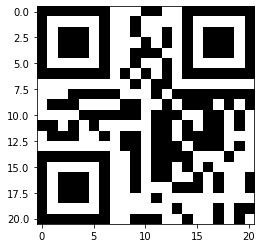

In [4]:
# building and displaying the QR code
Image =build(encode_using_hamming(Input_Text,add_error=True, at_position=[1,24,45,70,110]),masking=True)
plt.imshow(Image,cmap='gray')
plt.show()

In [5]:
# decoding the text from the QR code
Output_Text=decode_using_hamming(unbuild(Image))

Error corrected at position:  1
Error corrected at position:  9
Error corrected at position:  15
Error corrected at position:  10
Error corrected at position:  5


In [7]:
# outputting the decoded text
print(Output_Text)

www.google.com


In [8]:
print("Input Text: ",Input_Text)
print("Output Text: ",Output_Text)

Input Text:  www.google.com
Output Text:  www.google.com
